In [375]:
## Erdos Bootcamp
## Josimar A. Silva, May 2021
## This script reads and plot the EEG dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
## reading dataframe
df = pd.read_csv('./data/FullData/dataHeader.csv')
sensorValue = np.loadtxt('./data/FullData/sensorValue.dat')

In [377]:
df['groupUnicode'] = df['group'] == 'a' 
df['groupUnicode'] = df['groupUnicode'].astype(int)

In [378]:
## Defining window to compute feature 
dt = 3.9 ## ms
tData = np.arange(0,256) * dt
tMinSearch = int(300 / dt) ## 200 ms
tMaxSearch = int(800 / dt) ## 600 ms

print("tminSearch = ", tMinSearch)
print("tmaxSearch = ", tMaxSearch)


tminSearch =  76
tmaxSearch =  205


In [379]:
## Extraccting some features
meanValue = np.mean(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
maxValue = np.max(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
minValue = np.min(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
maxAbsValue = np.max(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
minAbsValue = np.min(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
meanAbsValue = np.mean(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
stdAbsValue = np.std(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
tMax = dt * np.argmax(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1).reshape(sensorValue.shape[0],1)
tMin = dt * np.argmin(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1).reshape(sensorValue.shape[0],1)
tMaxMinDiff = np.abs(tMax - tMin)
sumAbsValue = np.sum(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), axis=1, keepdims=True)
sumValue = np.sum(sensorValue[:,tMinSearch:tMaxSearch], axis=1, keepdims=True)
percentile95th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 95, axis=1, keepdims=True)
percentile75th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 75, axis=1, keepdims=True)
percentile25th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 25, axis=1, keepdims=True)
percentile5th = np.percentile(np.abs(sensorValue[:,tMinSearch:tMaxSearch]), 5, axis=1, keepdims=True)



In [380]:
## Adding new attributes to the dataframe
df['stdValue'] = stdAbsValue
df['meanValue'] = meanValue
df['maxValue'] = maxValue
df['minValue'] = minValue
df['maxAbsValue'] = maxAbsValue
df['minAbsValue'] = minAbsValue
df['meanAbsValue'] = meanAbsValue
df['tMax'] = tMax
df['tMin'] = tMin
df['tMaxMinDiff'] = tMaxMinDiff
df['sumAbsValue'] = sumAbsValue
df['sumValue'] = sumValue
df['percentile95th'] = percentile95th
df['percentile75th'] = percentile75th
df['percentile25th'] = percentile25th
df['percentile5th'] = percentile5th
df.head()

,group,subject,condition,trial,channel,chanNumber,groupUnicode,stdValue,meanValue,maxValue,...,meanAbsValue,tMax,tMin,tMaxMinDiff,sumAbsValue,sumValue,percentile95th,percentile75th,percentile25th,percentile5th
0,a,43,S1 obj,0,FP1,0,1,6.245153,11.450248,23.631,...,12.075922,191.1,374.4,183.3,1557.794,1477.082,21.6780,17.283,7.029,2.1868
1,a,43,S1 obj,0,FP2,1,1,13.447575,-28.601822,-3.276,...,28.601822,288.6,35.1,253.5,3689.635,-3689.635,48.6860,39.897,16.459,10.6000
2,a,43,S1 obj,0,F7,2,1,10.828829,-11.423039,11.617,...,14.017736,292.5,19.5,273.0,1808.288,-1473.572,37.0158,20.610,6.246,0.7040
3,a,43,S1 obj,0,F8,3,1,4.321511,0.381566,14.882,...,5.745891,288.6,66.3,222.3,741.220,49.222,13.6128,8.067,2.187,0.2540
4,a,43,S1 obj,0,AF1,4,1,9.273727,-11.540132,4.323,...,12.243667,288.6,198.9,89.7,1579.433,-1488.677,29.3680,18.138,3.489,0.9050


In [381]:
#df2 = df[ df['condition'] == 'S1 obj' ]
df2 = df[ df['condition'] == 'S1 obj' ]
df3 = df2[ df2['channel'] == 'CZ' ]

dfSel = df3
dfSel.head()

,group,subject,condition,trial,channel,chanNumber,groupUnicode,stdValue,meanValue,maxValue,...,meanAbsValue,tMax,tMin,tMaxMinDiff,sumAbsValue,sumValue,percentile95th,percentile75th,percentile25th,percentile5th
15,a,43,S1 obj,0,CZ,15,1,6.337123,-3.196589,15.055,...,7.996140,288.6,15.6,273.0,1031.502,-412.360,19.4174,12.777,3.011,0.5700
79,a,43,S1 obj,0,CZ,15,1,6.337123,-3.196589,15.055,...,7.996140,288.6,15.6,273.0,1031.502,-412.360,19.4174,12.777,3.011,0.5700
207,a,43,S1 obj,2,CZ,15,1,7.379602,-8.098977,6.663,...,9.224853,386.1,202.8,183.3,1190.006,-1044.768,23.8058,13.357,2.757,0.3150
335,a,43,S1 obj,4,CZ,15,1,8.080416,-17.011512,2.940,...,17.072550,42.9,460.2,417.3,2202.359,-2194.485,30.5564,21.962,12.197,4.3840
463,a,43,S1 obj,6,CZ,15,1,8.693512,12.764372,37.882,...,13.080450,11.7,218.4,206.7,1687.378,1646.604,29.1912,18.351,6.144,1.4238


In [304]:
print('Number of rown in DF = ', dfSel)

Number of rown in DF =         group  subject condition  trial channel  chanNumber  groupUnicode  \
15         a       43    S1 obj      0      CZ          15             1   
79         a       43    S1 obj      0      CZ          15             1   
207        a       43    S1 obj      2      CZ          15             1   
335        a       43    S1 obj      4      CZ          15             1   
463        a       43    S1 obj      6      CZ          15             1   
...      ...      ...       ...    ...     ...         ...           ...   
193935     c       38    S1 obj     10      CZ          15             0   
194127     c       38    S1 obj     14      CZ          15             0   
194255     c       38    S1 obj     16      CZ          15             0   
194319     c       38    S1 obj     18      CZ          15             0   
194447     c       38    S1 obj     20      CZ          15             0   

        meanValue  maxValue  minValue  ...   tMax   tMin  tMaxM

Text(0, 0.5, 'tMaxMinDiff')

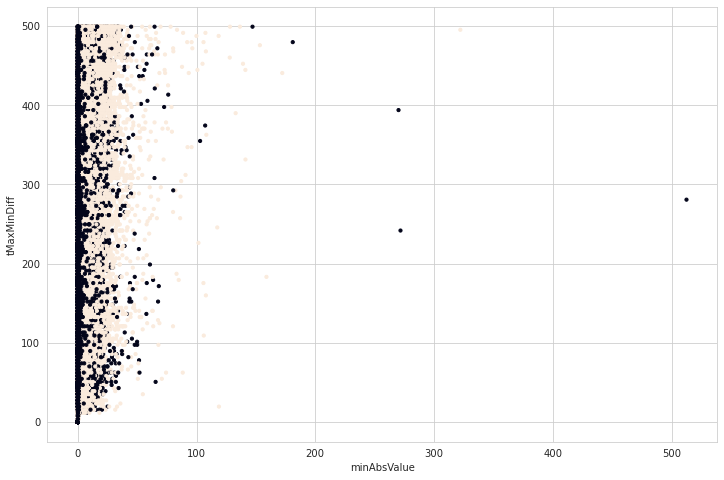

In [382]:
id1=12; id2=16
plt.figure("test", figsize=(12,8))
plt.scatter(df.iloc[:,id1], df.iloc[:,id2], s=10, c = df['groupUnicode'], marker="o")
plt.xlabel(df.columns[id1])
plt.ylabel(df.columns[id2])

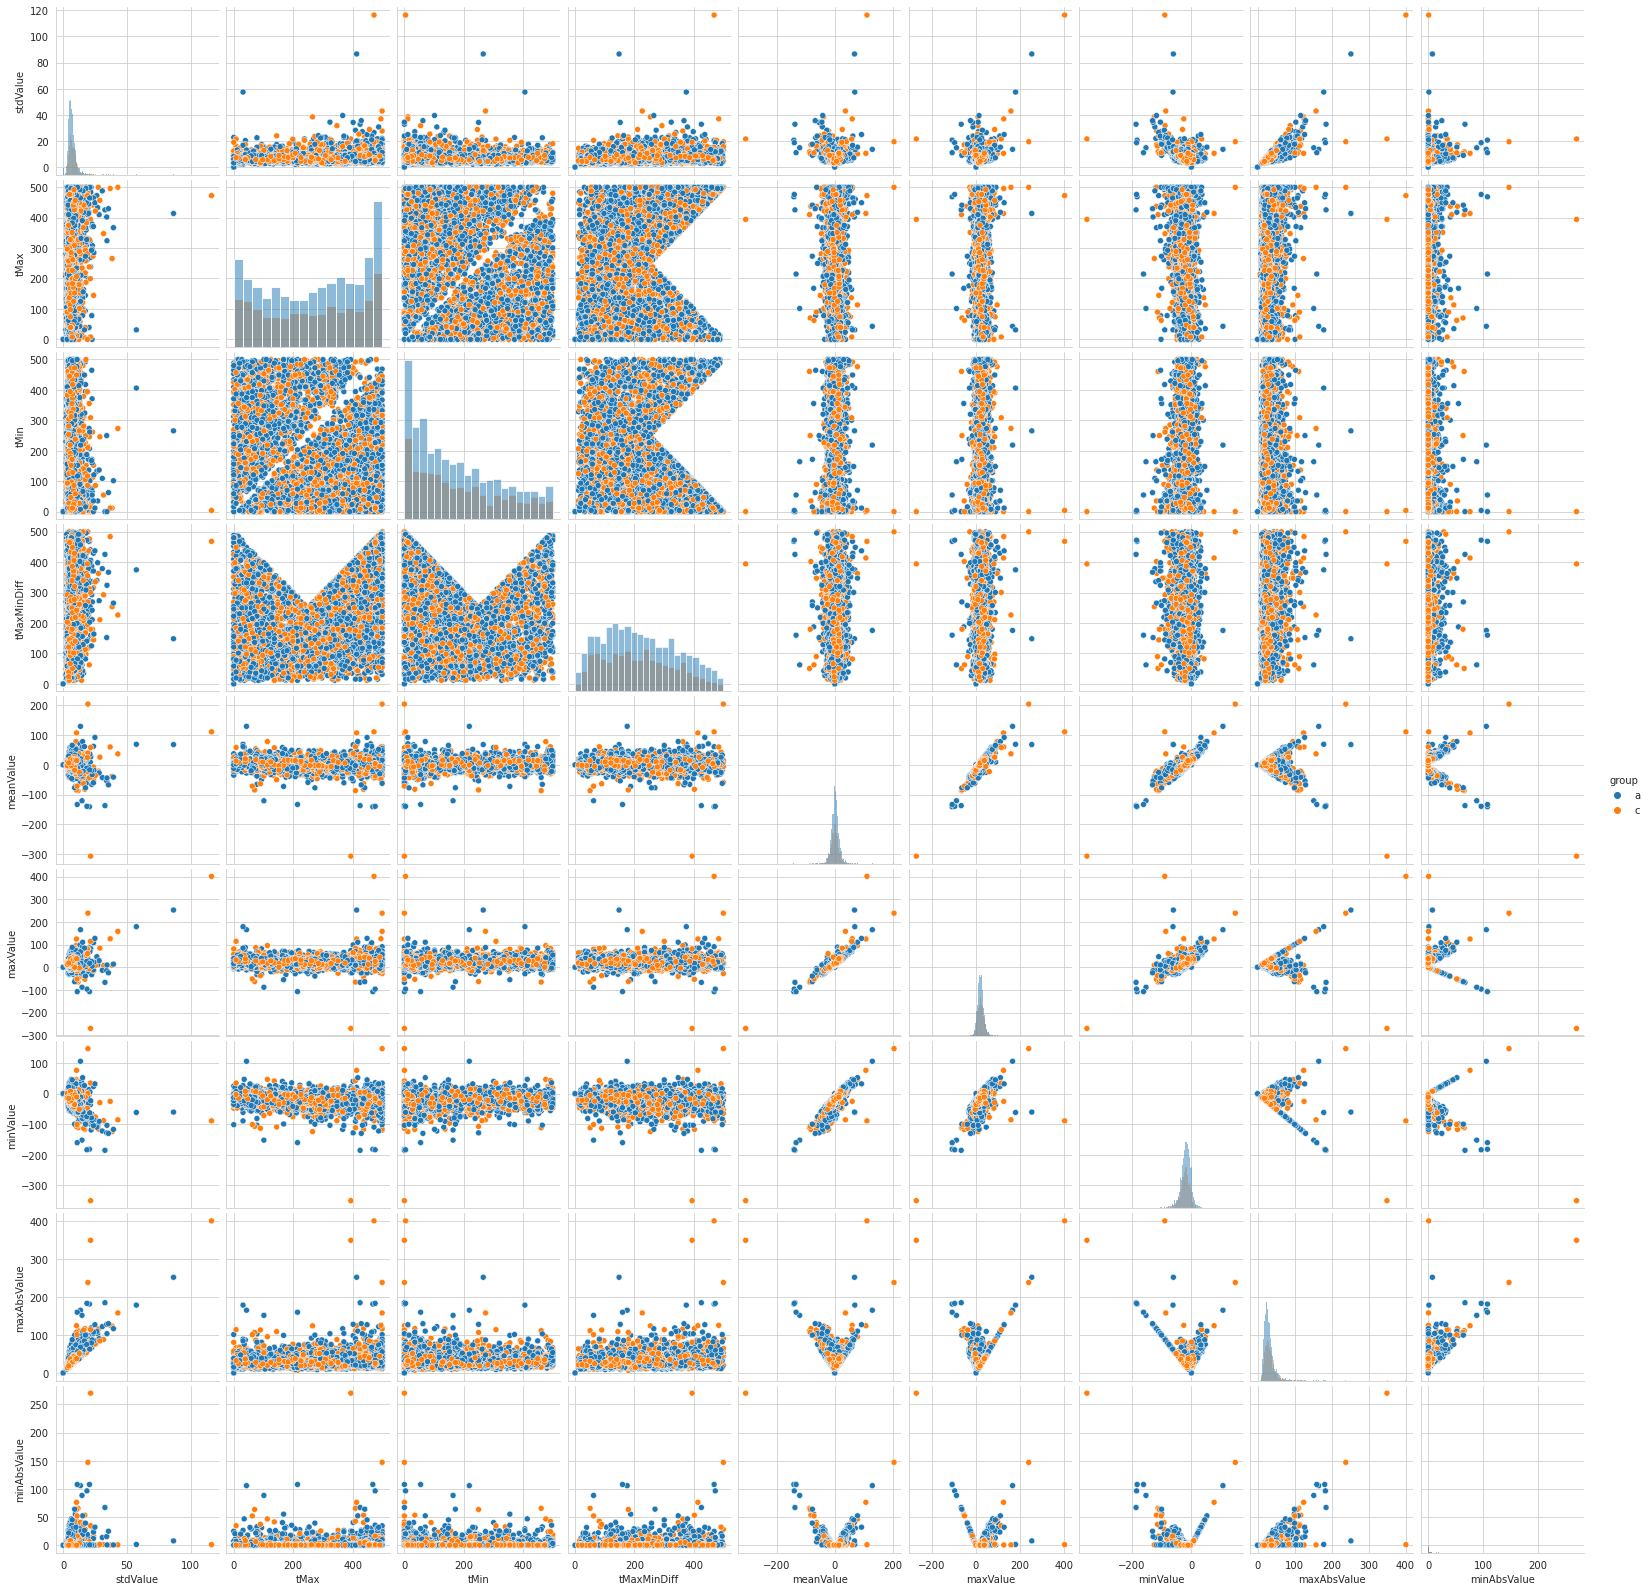

In [383]:
'''
df['meanValue'] = meanValue
df['maxValue'] = maxValue
df['minValue'] = minValue
df['maxAbsValue'] = maxAbsValue
df['minAbsValue'] = minAbsValue
df['meanAbsValue'] = meanAbsValue
df['tMax'] = tMax
df['tMin'] = tMin
df['tMaxMinDiff'] = tMaxMinDiff
df['sumAbsValue'] = sumAbsValue
df['sumValue'] = sumValue
df['percentile95th'] = percentile95th
df['percentile75th'] = percentile75th
df['percentile25th'] = percentile25th
df['percentile5th'] = percentile5th
'''
sns.pairplot(dfSel,hue="group", diag_kind="hist", vars=["stdValue","tMax","tMin", "tMaxMinDiff","meanValue", "maxValue", "minValue","maxAbsValue","minAbsValue"])

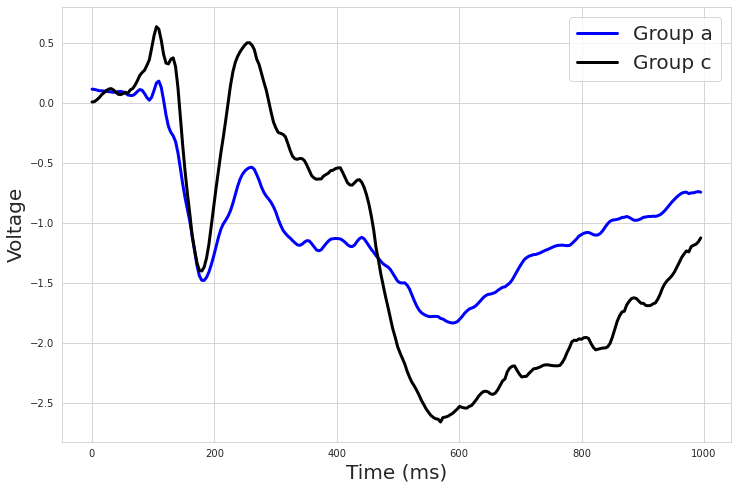

In [394]:
tmpA = sensorValue[df['group'] == "a",:]
tmpA = np.mean(tmpA, axis=0)
tmpB = sensorValue[df['group'] == "c",:]
tmpB = np.mean(tmpB, axis=0)
t = dt * np.arange(0, len(tmpA))

fontSize=20
plt.figure(figsize=(12,8))
plt.plot(t,tmpA, color="blue", label='Group a', linewidth=3)
plt.plot(t,tmpB, color="black", label='Group c', linewidth=3)
plt.xlabel('Time (ms)', fontsize=fontSize)
plt.ylabel('Voltage', fontsize=fontSize)
plt.legend(loc="best", fontsize=fontSize)


In [412]:
df2 = df[ df['condition'] == 'S1 obj' ]

cNameAll = df['channel'].unique()

fontSize=20
plt.figure(figsize=(12,8))
#plt.subplot(8,8)
count=1
i=1; j=1
for cName in cNameAll:
    df3 = df2[ df2['channel'] == cName ]
    print(cName)
    tmpA = sensorValue[df3['group'] == "a",:]
    tmpA = np.mean(tmpA, axis=0)
    tmpB = sensorValue[df3['group'] == "c",:]
    tmpB = np.mean(tmpB, axis=0)

    plt.subplot(8,8,count)
    plt.plot(tData,tmpA, color="blue", label='Group a', linewidth=3)
    plt.plot(tData,tmpB, color="black", label='Group c', linewidth=3)
    plt.xlabel('Time (ms)', fontsize=fontSize)
    plt.ylabel('Voltage', fontsize=fontSize)
    plt.legend(loc="best", fontsize=fontSize)
    
    count = count + 1
    


FP1


IndexError: boolean index did not match indexed array along dimension 0; dimension is 707712 but corresponding boolean dimension is 5478

<Figure size 864x576 with 0 Axes>

In [418]:
df2 = df[ df['condition'] == 'S1 obj' ]
df3 = df2[ df2['channel'] == 'FP1' ]
sensorValue[df3['group'] == "a",:]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 707712 but corresponding boolean dimension is 5478

In [307]:
from sklearn.model_selection import train_test_split

In [352]:
'''
## Adding new attributes to the dataframe
df['stdValue'] = stdAbsValue
df['meanValue'] = meanValue
df['maxValue'] = maxValue
df['minValue'] = minValue
df['maxAbsValue'] = maxAbsValue
df['minAbsValue'] = minAbsValue
df['meanAbsValue'] = meanAbsValue
df['tMax'] = tMax
df['tMin'] = tMin
df['tMaxMinDiff'] = tMaxMinDiff
df['sumAbsValue'] = sumAbsValue
df['sumValue'] = sumValue
df['percentile95th'] = percentile95th
df['percentile75th'] = percentile75th
df['percentile25th'] = percentile25th
df['percentile5th'] = percentile5th
'''

X = dfSel[ ['meanValue','maxValue', 'minValue','sumAbsValue', 'stdValue','maxAbsValue','minAbsValue','meanAbsValue'] ].to_numpy()
y = dfSel[['groupUnicode']].to_numpy()

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=200, shuffle=True, stratify=y)

In [365]:
from sklearn.neighbors import KNeighborsClassifier

In [366]:
knn = KNeighborsClassifier(n_neighbors=3)

In [367]:
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [368]:
y_predict = knn.predict(X_train)

## We calculate the accuracy here
## sum a list of booleans and True gets cast as 1
## False gets cast as 0
print("Our model has a ",
      np.round(sum(y_predict == y_train.ravel())/len(y_train.ravel())*100,2),
      "% accuracy on the training set")

Our model has a  75.18 % accuracy on the training set


In [369]:
from sklearn.model_selection import StratifiedKFold


In [370]:
nSplits=5
kfold = StratifiedKFold(nSplits,shuffle=True,random_state=440)

In [371]:
def get_acc(model, X,y):
    pred = model.predict(X)
    return np.sum(pred == y) / len(y)

In [372]:
max_neighbors = 20

accs = np.zeros((nSplits,max_neighbors))

## Keep track of the train test spli
j = 0

for train_index, test_index in kfold.split(X_train, y_train):
    #print("Train =",train_index)
    #print("Test = ",test_index)
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1, max_neighbors+1):
        knn = KNeighborsClassifier(i)
        knn.fit(X_train_train, y_train_train.ravel())
        accs[j,i-1] = get_acc(knn, X_train_test, y_train_test.ravel())
    j = j + 1

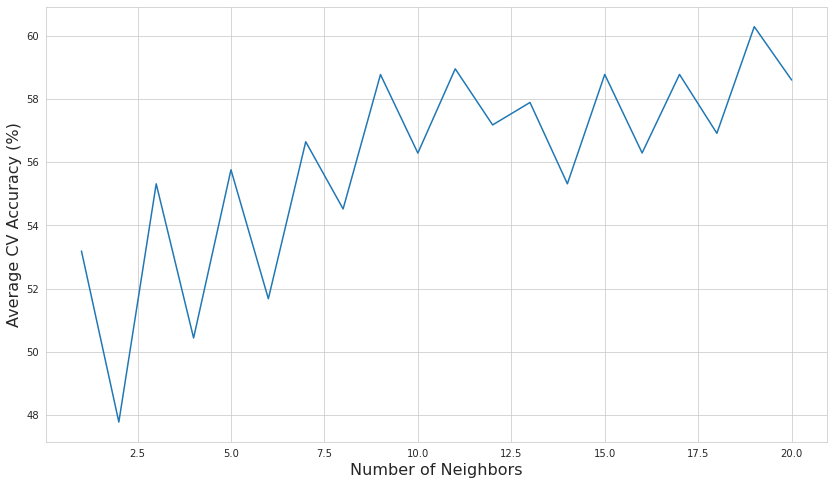

In [373]:
## Plotting 
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0))

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.show()

In [374]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
get_acc(knn, X_test, y_test.ravel())

0.5292553191489362